<a href="https://colab.research.google.com/github/notnsas/cautious-eureka/blob/main/aplikasi_ds/TF_IDF_KMEAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kode yang jadi yang cari sendiri**

## **Import Data**

Notebook ini melakukan modeling terhadap dataset tweet bertema **Ramadan**

In [34]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_scorea
import re, seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

dm = pd.read_csv("https://raw.githubusercontent.com/LatiefDataVisionary/text-mining-and-natural-language-processing-college-task/refs/heads/main/datasets/ramadan_labeled_sentiment.csv", usecols=["tweet_clean", "sentiment"])
dm.columns = ["tweet_clean", "sentiment"]
dm.head(10)

,tweet_clean,sentiment
0,"['abraj', 'al', 'bait', 'clock', 'tower', 'bea...",negative
1,"['accounts', 'recognised', 'ramadan', 'none', ...",negative
2,"['admin', 'post', 'peaceful', 'ramadan', 'cele...",positive
3,"['admin', 'post', 'ramadan', 'norway']",negative
4,"['admin', 'post', 'ramadan', 'usual', 'peacefu...",positive
5,"['alfas', 'inside', 'mega', 'chicken', 'aftern...",negative
6,"['alhamdulillah', 'every', 'lesson', 'every', ...",positive
7,"['allah', 'forgive', 'us', 'sins', 'past', 'fu...",positive
8,"['allah', 'help', 'brothers', 'gaza', 'lift', ...",positive
9,"['allah', 'help', 'us', 'al-aqsa', 'prisons', ...",negative


## Penjelasan Import Library:

- `pandas` & `numpy`: Untuk manipulasi data dan perhitungan numerik.  
- `sklearn.cluster.KMeans`: Untuk melakukan klasterisasi data.  
- `sklearn.model_selection.train_test_split`: Untuk membagi data menjadi data latih dan data uji.  
- `sklearn.metrics`: Untuk evaluasi model (misalnya akurasi atau `silhouette_score`).  
- `sklearn.decomposition.PCA`: Untuk reduksi dimensi data ke 2D/3D agar dapat divisualisasikan.  
- `seaborn` & `matplotlib`: Untuk visualisasi data dan hasil analisis.  
- `re`: Untuk manipulasi teks menggunakan ekspresi reguler.  
- `mpl_toolkits.mplot3d`: Untuk membuat visualisasi 3D.  
- `ListedColormap`: Untuk memberi warna khusus pada hasil visualisasi.

## Pengambilan Data:

Dataset diambil dari GitHub melalui URL dan hanya menggunakan dua kolom penting:

- `tweet_clean`: Isi tweet yang sudah dibersihkan.  
- `sentiment`: Label sentimen dari tweet.

Contoh 10 data pertama ditampilkan menggunakan:

## **Menggabungkan string list menjadi string**

## Proses Penggabungan Kata pada Tweet

Kolom `tweet_clean` awalnya berisi data dalam bentuk list string

In [35]:
# Menggabungkan string list menjadi string biasa
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
dm["tweet_join"] = dm["tweet_clean"].apply(join_text_list)

dm["tweet_join"].head()

,tweet_join
0,abraj al bait clock tower beams indicating com...
1,accounts recognised ramadan none recognised be...
2,admin post peaceful ramadan celebrations east ...
3,admin post ramadan norway
4,admin post ramadan usual peaceful start englan...


## **Menghitung TF-IDF**

Menghitung TF-IDF menggunakan TfidfVectorizer
Untuk menghitung TF-IDF menggunakan Scikit-Learn, dapat dilakukan dengan cara berikut,

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan,
# di pilih berdasarkan top max_features
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 1000

# Feature Engineering
print ("------- TF-IDF on Tweet data -------")

tf_idf = TfidfVectorizer(max_features=max_features, ngram_range=(1,2),
    stop_words='english')
tf_idf.fit(dm["tweet_join"])  # Melakukan fitting terlebih dahulu
tfidf_mat = tf_idf.transform(dm["tweet_join"]).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

------- TF-IDF on Tweet data -------
TF-IDF  <class 'numpy.ndarray'> (836, 1000)


## **Hasil Matriks TF‑IDF**

Hasil dari Matriks TF-IDF yang diubah ke dataframe

In [37]:
import pandas as pd

# Mengambil nama fitur (term)
feature_names = tf_idf.get_feature_names_out()

# Membuat DataFrame
df_tfidf = pd.DataFrame(tfidf_mat, columns=feature_names)

# Menampilkan DataFrame
display(df_tfidf.head(20))

,able,abu,accept,accepted,according,accounts,act,action,acts,additionally,...,ya,ya allah,year,year old,years,yes,yesterday,york,young,zazzau
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.385008,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
5,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
6,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
7,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
9,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


Baris mewakili tiap dokumen/data, sedangkan kolom menunjukkan semua kata yang ada di dalam korpus. Jika sebuah kata muncul dalam suatu dokumen, maka pada perpotongan baris dan kolom tersebut akan terisi nilai TF‑IDF-nya.

## **Pemisahan Fitur (X) dan Label (y) dan Split data** ##

Setelah melakukan proses ekstraksi fitur dengan TF-IDF, kita memisahkan data menjadi:

- `X`: Berisi matriks TF-IDF dari tweet yang sudah dibersihkan (`tfidf_mat`).
- `y`: Berisi label sentimen dari setiap tweet (`dm['sentiment']`).

In [39]:
# Memasukan matrix tf_idf dan kelas sentimen ke X dan y
X, y = tfidf_mat, dm['sentiment']

## Pembagian Dataset menjadi Data Latih dan Data Uji

Dataset fitur (`X`) dan label (`y`) dibagi menjadi dua bagian:

- **Data latih (training set):** 70% data digunakan untuk melatih model.  
- **Data uji (test set):** 30% data digunakan untuk menguji performa model.

In [40]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # 70% training and 30% test

## **Visualisasi data sebelum di modelkan menggunakan pca karena kolom terlalu banyak**

Untuk memudahkan visualisasi kmeans, digunakan **Principal Component Analysis (PCA)** dengan tujuan mengubah fitur asli menjadi fitur baru yang lebih sedikit, yaitu 3 komponen utama.

- `pca = PCA(n_components=3)`: Membuat objek PCA untuk mengekstrak 3 komponen utama.  
- `X_pca = pca.fit_transform(X_train)`: Melakukan fitting PCA pada data latih dan mentransformasikan data ke dalam ruang 3 dimensi baru.  
- `col_pca = pca.get_feature_names_out()`: Mendapatkan nama kolom untuk masing-masing komponen utama yang baru.  
- `df_pca = pd.DataFrame(X_pca, columns=col_pca)`: Mengubah hasil PCA menjadi DataFrame agar mudah dianalisis dan divisualisasikan.


In [41]:
# Memilih kolom pca
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)

# Mendapatkan nama kolom
col_pca = pca.get_feature_names_out(input_features=None)

# Menjadikan pca menjadi datatframe
df_pca = pd.DataFrame(X_pca, columns=col_pca)
df_pca

,pca0,pca1,pca2
0,-0.016590,-0.005411,-0.105754
1,-0.033010,-0.008458,0.340785
2,-0.038625,-0.045336,-0.064091
3,0.041976,0.069655,0.024894
4,-0.062013,0.004149,0.136053
...,...,...,...
580,0.002637,-0.050304,-0.052217
581,-0.090238,-0.021993,-0.104711
582,-0.056973,0.010854,0.239572
583,-0.027429,-0.035109,0.018469


<ipython-input-42-e58918012ffa>:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(x, y, z, s=40, marker='o', cmap='viridis', alpha=1)
/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1121: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


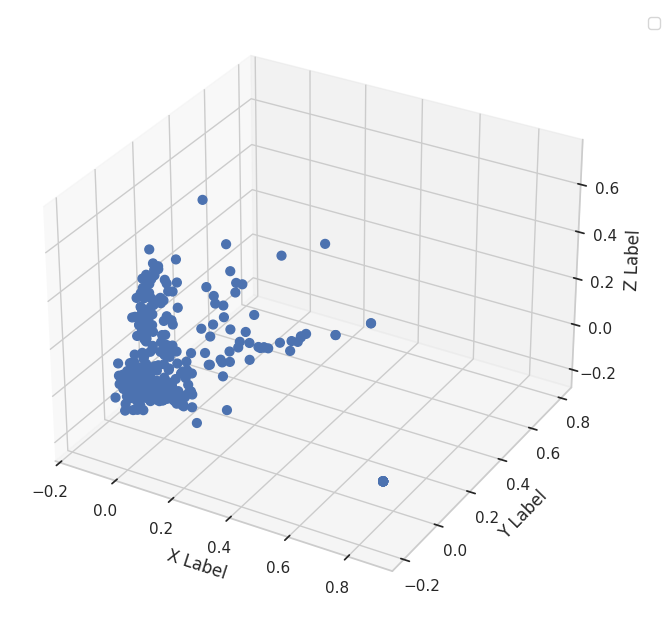

In [42]:
# generate data
x = df_pca['pca0']
y = df_pca['pca1']
z = df_pca['pca2']

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# dapetin colormap dari seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, marker='o', cmap='viridis', alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


Menampilkan data hasil PCA pada 3 komponen utama dalam plot 3D.  
Kode membuat scatter plot dengan warna menggunakan colormap `viridis` dan label sumbu X, Y, Z.

## **Training model**

## Menentukan Jumlah Cluster Optimal dengan KMeans

- Melakukan training KMeans dengan jumlah cluster (`k`) dari 2 sampai 7.  
- Menyimpan model dan nilai inertia (sum of squared distances) tiap `k`.  
- Inertia digunakan untuk menilai kualitas klaster: semakin kecil, semakin baik.  

Kode ini membantu menentukan `k` terbaik dengan metode elbow.

In [43]:
K = range(2, 8)
fits = []
score = []

for k in K:
    # train model gunain k didalam loop
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train)

    # append model ke fits
    fits.append(model)

    # Append score inertia ke score
    score.append(model.inertia_)
    # score_sil.append(silhouette_score(X_train, model.labels_, metric='euclidean'))

## **Menentukan K terbaik dengan elbow method**

## Visualisasi Metode Elbow untuk Menentukan Jumlah Cluster Optimal

Plot grafik antara jumlah cluster (`k`) dan nilai inertia (score) dari hasil KMeans.  
Titik "elbow" pada grafik menunjukkan nilai `k` yang memberikan keseimbangan terbaik antara kompleksitas dan kualitas klaster.


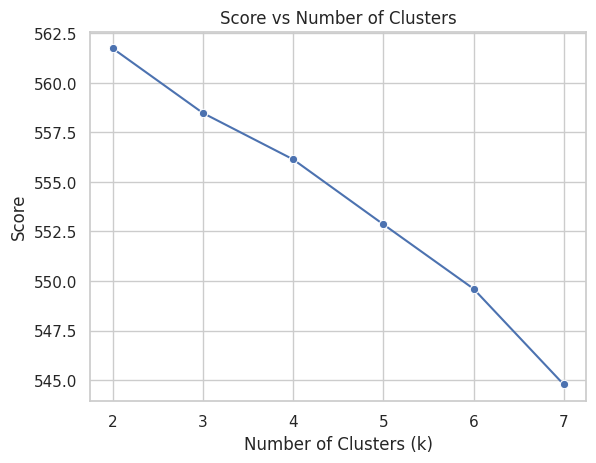

In [44]:
# Ngeplot k vs score
sns.set(style='whitegrid')
sns.lineplot(x=K, y=score, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Score vs Number of Clusters')
plt.show()


Berdasarkan grafik elbow, titik siku (elbow point) yang paling jelas terlihat ada pada **k = 3**, sehingga jumlah cluster optimal dipilih sebanyak 3.

## **Visualisasi Data Setelah Klasterisasi dengan KMeans (k=3)**



Menampilkan plot 3D menggunakan cluster center yang ditransform dengan hasil PCA karena kolom terlalu banyak, yang telah dikelompokkan menggunakan KMeans dengan 3 cluster.  
Setiap titik diberi warna sesuai dengan cluster-nya untuk memudahkan identifikasi pola dan sebaran klaster.


In [45]:
# Memilih kolom pca
pca = PCA(n_components=3)

# Membuat df menggunakan koordinat cluster center
cluster = fits[1].cluster_centers_
df_clus = pca.fit_transform(cluster)

# Mendapatkan nama kolom
col_pca = pca.get_feature_names_out(input_features=None)

# Menjadikan pca menjadi datatframe
pca_cl = pd.DataFrame(df_clus, columns=col_pca)
pca_cl

,pca0,pca1,pca2
0,-0.184392,0.078457,1.464114e-16
1,0.195790,0.065508,1.464114e-16
2,-0.011398,-0.143965,1.464114e-16


Berikut adalah kode visualisasi menggunakan data PCA sebelumnya dengan warna berdasarkan kelompok cluster yang sudah ditetapkan.


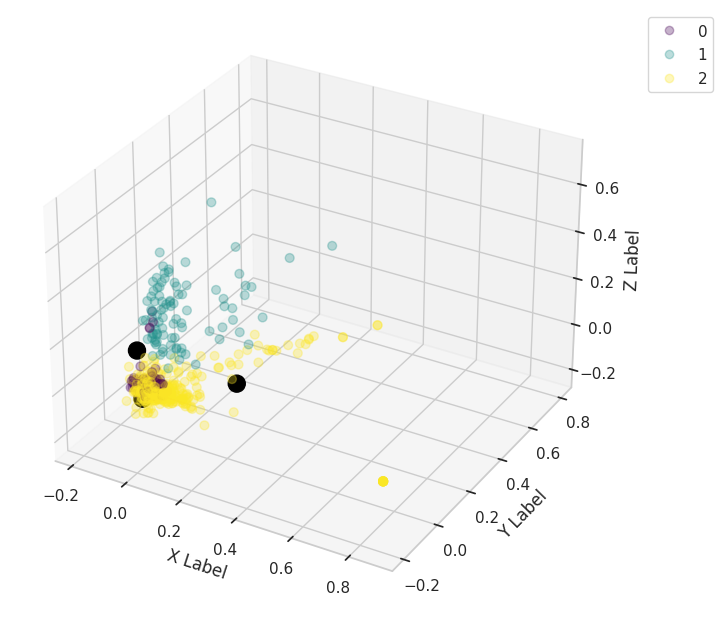

In [62]:
# generate data
x = df_pca['pca0']
y = df_pca['pca1']
z = df_pca['pca2']

xc = pca_cl['pca0']
yc = pca_cl['pca1']
zc = pca_cl['pca2']

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# dapetin colormap dari seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
ax.scatter(xc, yc, zc,c="black",s=150,label="Centers",alpha=1)
sc = ax.scatter(x, y, z, s=40, c=fits[1].labels_, marker='o', cmap='viridis', alpha=0.3)
# ax.scatter(, c='red', s=150, marker='X', label='Cluster Centers')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


Visualisasi ini menampilkan titik data hasil reduksi dimensi PCA dalam ruang 3D, dimana setiap titik diwarnai berdasarkan cluster yang ditentukan oleh KMeans (dengan k=3). Titik hitam besar menunjukkan posisi pusat (centroid) dari masing-masing cluster.